In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from minisom import MiniSom

In [10]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values.ravel()

In [33]:
som = MiniSom(x=7, y=7, input_len=4, sigma=3.0, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=42)
som.pca_weights_init(X)
som.train_batch(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.018065413370674105
 topographic error: 0.14


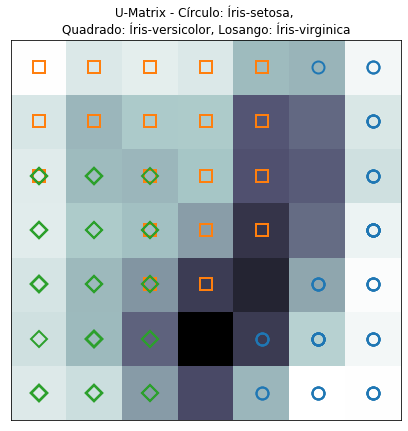

In [67]:
# plt.figure(figsize=(7, 7))
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.pcolor(som.distance_map().T, cmap='bone_r')


markers = {'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': 'D'}
colors = {'Iris-setosa': 'C0', 'Iris-versicolor': 'C1', 'Iris-virginica': 'C2'}

for i, x in enumerate(X):
    w = som.winner(x)
    marker = markers[y[i]]
    color = colors[y[i]]
    ax.plot(w[0]+.5, w[1]+.5, marker, markerfacecolor='None',
             markeredgecolor=color, markersize=12, markeredgewidth=2)
ax.set_title('U-Matrix - Círculo: Íris-setosa, \nQuadrado: Íris-versicolor, Losango: Íris-virginica')
ax.set_xticks([]); ax.set_yticks([]);

9.0

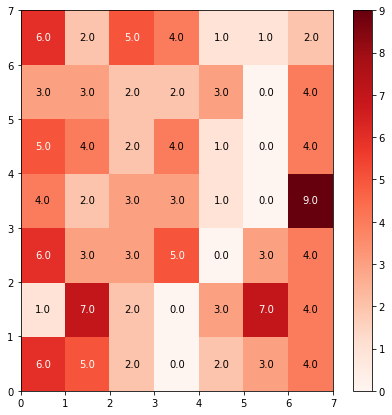

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
freq = som.activation_response(X)
plt.pcolor(freq.T, cmap='Reds') 
for (i, j), z in np.ndenumerate(freq.T):
    color = 'w' if z > freq.T.max()/2 else 'k'
    plt.text(j+0.5, i+0.5, '%.1f'%z, ha='center', va='center', color=color)
plt.colorbar()
plt.show()

In [81]:
som.distance_map().shape

(7, 7)

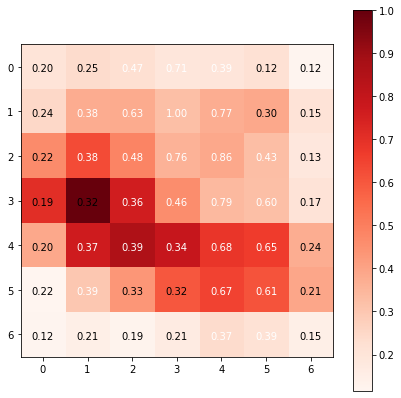

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
dm = som.distance_map()
plt.imshow(dm, cmap="Reds")
plt.colorbar()

for x in range(dm.shape[0]):
    for y in range(dm.shape[1]):
        color = 'w' if dm[x][y] > dm.max()/2 else 'k'
        plt.text(x-0.25, y+0.10, '%.2f'%dm[x][y], color=color)

In [ ]:
functions = ['gaussian', 'mexican_hat', 'bublle', 'triangle']
